# Logistic Regression 

### Introduction

# Step 1 Import Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer        # we use store data 
from sklearn.model_selection import train_test_split   # to split over data for training and testing
from sklearn.linear_model import LogisticRegression     # we import over algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

# step 2. Load_data_set

In [2]:
data = load_breast_cancer()                              # dictionary
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [3]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


# Step 3. EDA(exploratory data analysis)

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

when working a classification data than check target column is balance or not balance

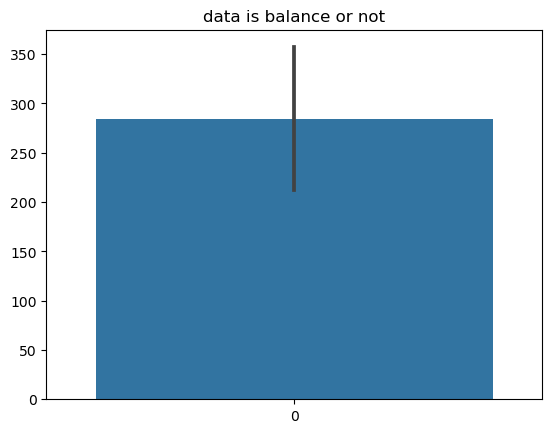

In [7]:
# data is not balance
sns.barplot(df['target'].value_counts())
plt.title("data is balance or not")
plt.show()

# Step 4.Assumption

1 Linearity            # it is apply before applying algorithm
2. multicollinearity   # we are check realtion between all independent variable (VIF)

### multicollinearity

In [8]:
x = df.drop('target',axis = 1)   # it is independet variable
new = pd.DataFrame()

In [9]:
new['features'] = x.columns
new

,features
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


In [10]:
x.shape[1]

30

In [11]:
new['vif']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [12]:
new.sort_values('vif',ascending = False)

,features,vif
0,mean radius,63306.172036
2,mean perimeter,58123.586079
20,worst radius,9674.742602
22,worst perimeter,4487.781270
3,mean area,1287.262339
23,worst area,1138.759252
9,mean fractal dimension,629.679874
29,worst fractal dimension,423.396723
4,mean smoothness,393.398166
24,worst smoothness,375.597155


### split the data

In [13]:
x = df.drop("target",axis=1)
y = df["target"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 41)

In [17]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
347,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.035280,0.1521,0.05912,...,17.27,17.93,114.20,880.8,0.12200,0.20090,0.215100,0.125100,0.3109,0.08187
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.070640,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.260400,0.139700,0.3151,0.08473
496,12.650,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.050740,0.1641,0.06854,...,14.38,22.15,95.29,633.7,0.15330,0.38420,0.358200,0.140700,0.3230,0.10330
319,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.016990,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.022370,0.028320,0.1901,0.05932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.021070,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.102000,0.056020,0.2688,0.06888
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.052520,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.34410,0.209900,0.102500,0.3038,0.12520
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.14280,0.25700,0.343800,0.145300,0.2666,0.07686
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,0.07976,...,11.69,20.74,76.08,411.1,0.16620,0.20310,0.125600,0.095140,0.2780,0.11680


# Step 5. Model Selection

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

d:\Users\welcome\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# step 6 Model Prediction

In [21]:
y_pred = model.predict(x_test)

# step 7 Model Evaluation

In [24]:
print("Accuracy_score :-",accuracy_score(y_pred,y_test))
print("Confusion_Matrix \n:-",confusion_matrix(y_pred,y_test))
print("Classification_report \n:-",classification_report(y_pred,y_test))                                        

Accuracy_score :- 0.9736842105263158
Confusion_Matrix 
:- [[37  0]
 [ 3 74]]
Classification_report 
:-               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.96      0.98        77

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

